In [20]:
import numpy as np
import cv2

In [35]:
img = cv2.imread('test3.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])


In [36]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
print(np.transpose(hist))

[[2488. 2157. 1359. 1158. 1036.  983.  928.  901.  891.  909.  949.  982.
   990.  926. 1013. 1043. 1155. 1114. 1231. 1241. 1265. 1293. 1312. 1304.
  1322. 1405. 1396. 1407. 1372. 1353. 1324. 1348. 1299. 1257. 1188. 1136.
  1116. 1079. 1101.  958. 1006.  996.  966.  923.  941.  920.  843.  925.
   894.  841.  925.  947.  906.  910.  920.  952.  973.  994. 1002. 1046.
  1054.  995. 1007. 1068. 1084. 1112. 1136. 1127. 1200. 1182. 1240. 1326.
  1398. 1437. 1657. 1610. 1793. 1983. 2105. 2232. 2461. 2753. 3095. 3525.
  3606. 3528. 3707. 3649. 3814. 3734. 3460. 3584. 3654. 3711. 3639. 3762.
  4028. 3844. 4189. 4095. 4106. 4097. 4374. 4638. 4912. 4955. 5702. 6168.
  6048. 5311. 4797. 4550. 4102. 3986. 3612. 3299. 3249. 3149. 3279. 3147.
  2795. 2537. 2463. 2189. 1996. 1926. 1945. 1762. 1709. 1592. 1597. 1521.
  1519. 1551. 1634. 1513. 1487. 1474. 1391. 1437. 1546. 1604. 1599. 1613.
  1684. 1596. 1513. 1623. 1766. 1683. 1580. 1745. 1705. 1751. 1827. 1720.
  1951. 1993. 1905. 1914. 1701. 1959. 

In [32]:
hist = np.bincount(img.ravel(),minlength=256)

In [33]:
from matplotlib import pyplot as plt

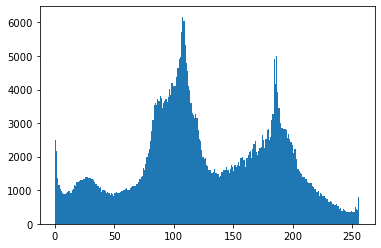

In [34]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

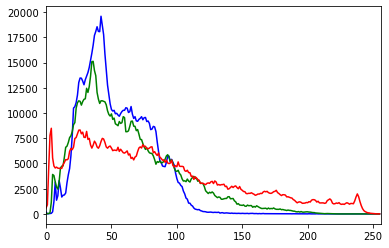

In [41]:
img = cv2.imread('test3.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

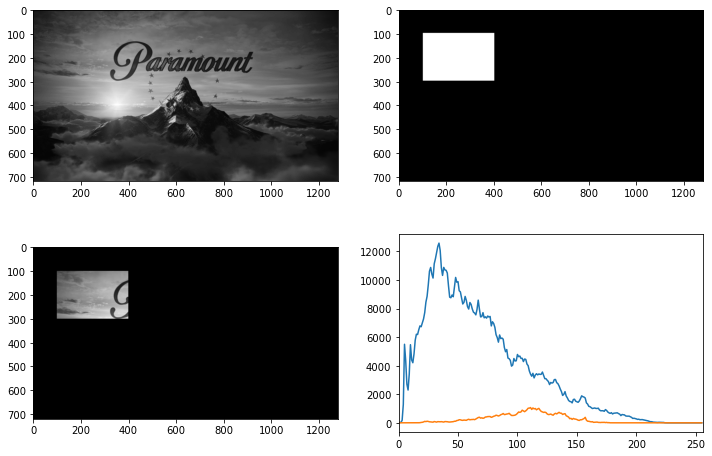

In [42]:
img = cv2.imread('test3.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

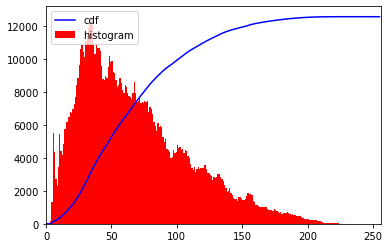

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('test3.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [52]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x248715ce0a0>)

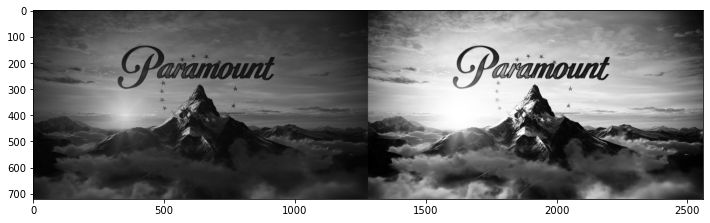

In [54]:
img = cv2.imread('test3.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.figure(figsize=(12,8))
plt.subplot(111), plt.imshow(res, 'gray')